In [21]:
# installing dependencies
!pip install eli5

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [23]:
# Reading the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/prachichatur04/World-Happiness-Report-data-scienece-project/main/2017.csv"
)

In [24]:
# Viewing data in the file
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [26]:
# checking if the any data is missing
data.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [27]:
data.drop(columns = ['Whisker.high','Whisker.low'],inplace = True)

<ipython-input-28-b63d4d78e58f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


<Axes: >

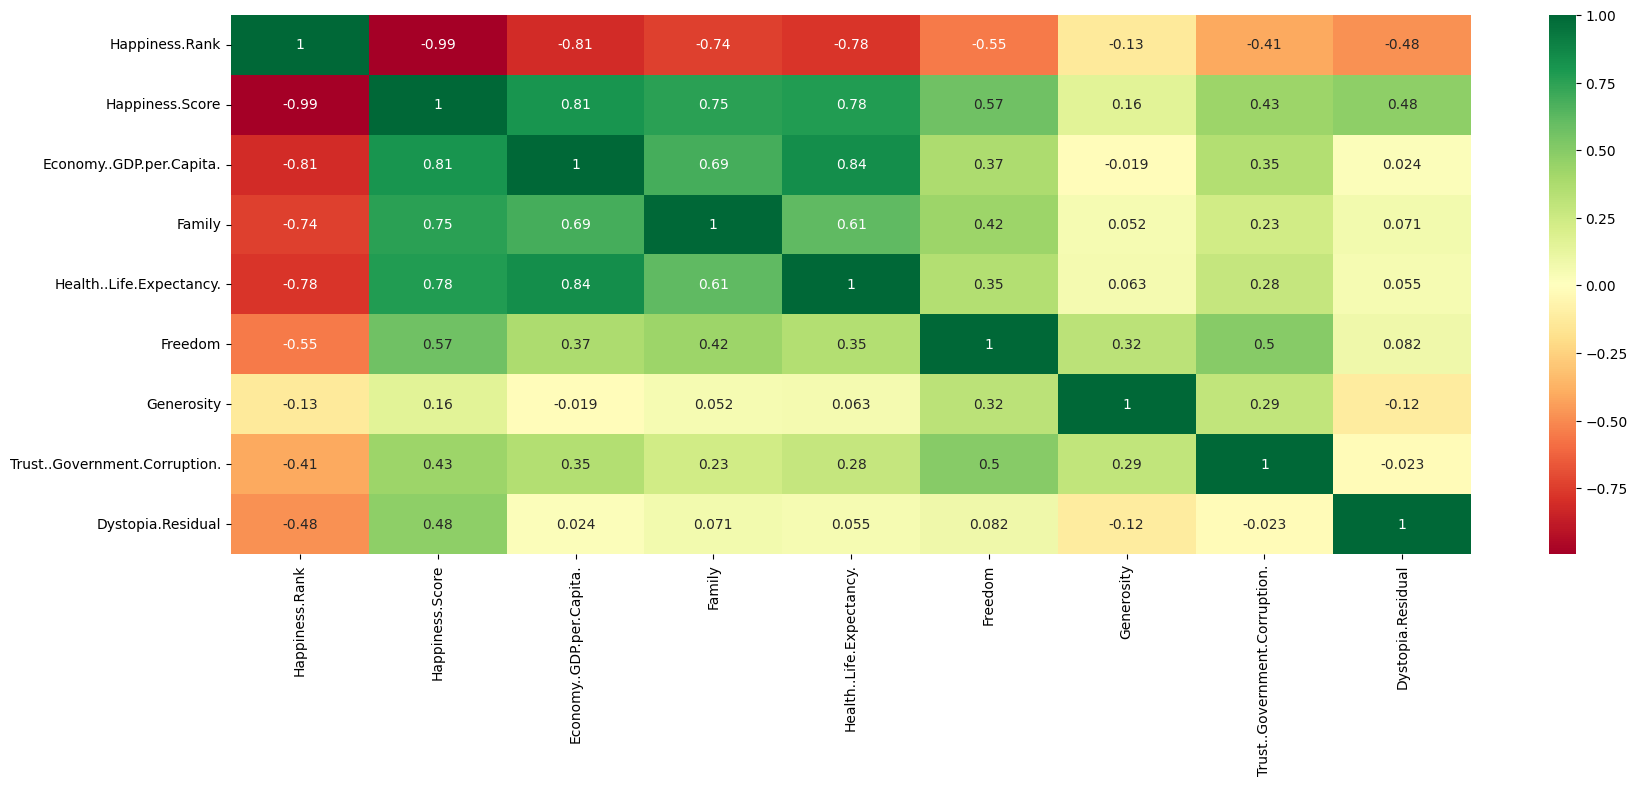

In [28]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [29]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Happiness.Score'], data[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom',
       'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness.Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.084e+09
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        02:10:55   Log-Likelihood:                          1048.2
No. Observations:                 155   AIC:                                     -2082.
Df Residuals:                     148   BIC:                                     -2061.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Economy..GDP.per.Capita.          1.0001      0.000   8505.961      0.000       1.000       1.000
Family                            1.0000      0.000   9840.168      0.000       1.000       1.000
Health..Life.Expectancy.          0.9999      0.000   5414.714      0.000       1.000       1.000
Freedom                           1.0000      0.000   5070.686      0.000       1.000       1.000
Generosity                        1.0003      0.000   5502.327      0.000       1.000       1.001
Trust..Government.Corruption.     0.9997      0.000   3603.191      0.000       0.999       1.000
Dystopia.Residual                 1.0000   3.74e-05   2.67e+04      0.000       1.000       1.000
==============================================================================
Omnibus:                       51.593   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.782
Skew:                          -0.073   Prob(JB):                       0.0124
Kurtosis:                       1.843   Cond. No.                         33.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
df = data[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom',
       'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']].dropna() #subset the dataframe

In [31]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = data[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom',
       'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                         feature        VIF
0       Economy..GDP.per.Capita.  29.936242
1                         Family  29.193421
2       Health..Life.Expectancy.  23.195492
3                        Freedom  13.930102
4                     Generosity   4.935212
5  Trust..Government.Corruption.   3.700258
6              Dystopia.Residual   9.714684


In [32]:
data

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have already defined X and y

X = data[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom',
       'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']]
y = data['Happiness.Score']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [34]:
print(len(y_test))

47


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Assuming you have already defined X_train and y_train

# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)


Ridge(alpha=0.5)

In [42]:
y_pred = ridge.predict(X_test)
print(len(y_pred))
from sklearn.metrics import mean_squared_error


47


In [43]:
# rmse after regularization
# Assuming you have already defined y_test and X_test

# Make predictions on the test data
y_pred = ridge.predict(X_test)
# Check the shapes of y_test and y_pred
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Ensure the shapes match
assert y_test.shape == y_pred.shape, "Number of samples in y_test and y_pred are not the same!"

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


Shape of y_test: (47,)
Shape of y_pred: (47,)
RMSE: 0.03686633141139459


In [44]:
data.head()

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [45]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=5aa249d842f68a5adb1eb839fff758155aab5eede453e6837c923bcedcde6a8d
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [46]:
import h2o

# Assuming you have already defined the variable 'data'

# Initialize H2O
h2o.init()

# Create H2OFrame from your data
data = h2o.H2OFrame(data)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2pls4wzl
  JVM stdout: /tmp/tmp2pls4wzl/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2pls4wzl/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_a7nqtn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [47]:
data

Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Norway,1,7.537,1.61646,1.53352,0.796667,0.635423,0.362012,0.315964,2.27703
Denmark,2,7.522,1.48238,1.55112,0.792566,0.626007,0.35528,0.40077,2.31371
Iceland,3,7.504,1.48063,1.61057,0.833552,0.627163,0.47554,0.153527,2.32272
Switzerland,4,7.494,1.56498,1.51691,0.858131,0.620071,0.290549,0.367007,2.27672
Finland,5,7.469,1.44357,1.54025,0.809158,0.617951,0.245483,0.382612,2.43018
Netherlands,6,7.377,1.50394,1.42894,0.810696,0.585384,0.47049,0.282662,2.2948
Canada,7,7.316,1.4792,1.48135,0.834558,0.611101,0.43554,0.287372,2.18726
New Zealand,8,7.314,1.40571,1.5482,0.81676,0.614062,0.500005,0.382817,2.04646
Sweden,9,7.284,1.49439,1.47816,0.830875,0.612924,0.385399,0.384399,2.09754
Australia,10,7.284,1.48441,1.51004,0.843887,0.601607,0.477699,0.301184,2.06521


In [48]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])


In [49]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [50]:
drift_data["is_train"].table()

is_train,Count
0,35
1,120


In [51]:
x = list(set(train.col_names) - set(["PM1.0"]))

In [52]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Happiness.Score", training_frame=train)

AutoML progress: |
02:20:25.241: _train param, Dropping bad and constant columns: [Country, is_train]

██
02:20:38.182: _train param, Dropping bad and constant columns: [Country, is_train]


02:20:39.724: _train param, Dropping bad and constant columns: [Country, is_train]
02:20:39.724: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.
02:20:39.741: _train param, Dropping bad and constant columns: [Country, is_train]

██
02:20:48.333: _train param, Dropping bad and constant columns: [Country, is_train]

█
02:20:53.90: _train param, Dropping bad and constant columns: [Country, is_train]

█
02:20:58.116: _train param, Dropping bad and constant columns: [Country, is_train]

█
02:21:01.105: _train param, Dropping bad and constant columns: [Country, is_train]

█
02:21:03.323: _train param, Dropping bad and constant columns: [Country, is_train]

██
02:21:10.743: _train param, Dropping bad and constant co

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240220_22024


GLM Model: summary
    family    link      regularization              lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.01117 )  nlambda = 30, lambda.max = 111.66, lambda.min = 0.01117, lambda.1se = 0.01534  8                             8                              30                      AutoML_1_20240220_22024_training_py_5_sid_a598

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.0005676811770954918
RMSE: 0.02382606088079798
MAE: 0.016979136538678868
RMSLE: 0.004688860521039153
Mean Residual Deviance: 0.0005676811770954918
R^2: 0.9995553337904015
Null degrees of freedom: 119
Residual degrees of freedom: 111
Null deviance: 153.19747662628578
Residual deviance: 0.06812174125145902
AIC: -536.3288246027824

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.0008425895887749841
RMSE: 0.029027393764769583
MAE: 0.02019779739128778
RMSLE: 0.005780285805017744
Mean Residual Deviance: 0.0008425895887749841
R^2: 0.9993399972840307
Null degrees of freedom: 119
Residual degrees of freedom: 111
Null deviance: 153.41416853668764
Residual deviance: 0.10111075065299809
AIC: -488.9384197788237

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.0201978   0.00458402   0.0154149     0.0167293     0.0187616     0.025323      0.0247603
mean_residual_deviance  0.00084259  0.000499788  0.000375434   0.000405131   0.000685951   0.00134252    0.00140391
mse                     0.00084259  0.000499788  0.000375434   0.000405131   0.000685951   0.00134252    0.00140391
null_deviance           30.6828     0.788701     30.0007       30.2104       30.1309       31.6755       31.3967
r2                      0.999345    0.000375023  0.999698      0.999678      0.999453      0.998981      0.998917
residual_deviance       0.0202222   0.0119949    0.00901041    0.00972315    0.0164628     0.0322204     0.033694
rmse                    0.0279608   0.00871669   0.0193761     0.0201279     0.0261907     0.0366404     0.0374688
rmsle                   0.00523669  0.00273606   0.00296343    0.00308455    0.00382112    0.00742145    0.00889288

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train         deviance_xval          deviance_se             alpha    iterations    training_rmse        training_deviance      training_mae          training_r2
---  -------------------  ----------  -----------  --------  ------------  ---------------------  ---------------------  ----------------------  -------  ------------  -------------------  ---------------------  --------------------  ------------------
     2024-02-20 02:20:39  0.000 sec   1            .11E3     9             1.1975969204889074     1.2144904154909526     0.013724027507152937    0.0
     2024-02-20 02:20:39  0.000 sec   2            .81E2     9             1.1699887960307782     1.1918259257265171     0.01339787324176381     0.0
     2024-02-20 02:20:39  0.001 sec   3            .59E2     9             1.1336525609739132     1.1618125721600365     0.012984973040644287    0.0
     2024-02-20 02:20:39  0.002 sec   4            .43E2     9             1.0865405490561482     1.122432657691983      0.0124705

In [53]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GLM_1_AutoML_1_20240220_22024,0.0201978,0.0290274,0.00084259,0.00578029,0.00084259
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_22024,0.023023,0.0338306,0.00114451,0.00672571,0.00114451
StackedEnsemble_AllModels_1_AutoML_1_20240220_22024,0.0431444,0.0731288,0.00534783,0.0154225,0.00534783
GBM_5_AutoML_1_20240220_22024,0.0877658,0.131344,0.0172512,0.023367,0.0172512
GBM_3_AutoML_1_20240220_22024,0.0879497,0.137779,0.0189829,0.0281301,0.0189829
GBM_2_AutoML_1_20240220_22024,0.106635,0.160301,0.0256964,0.031435,0.0256964
GBM_4_AutoML_1_20240220_22024,0.113098,0.170416,0.0290415,0.0333343,0.0290415
XGBoost_2_AutoML_1_20240220_22024,0.145143,0.193584,0.0374747,0.035902,0.0374747
XRT_1_AutoML_1_20240220_22024,0.151431,0.228293,0.0521175,0.0423173,0.0521175
XGBoost_3_AutoML_1_20240220_22024,0.158735,0.219877,0.0483459,0.0401496,0.0483459


In [54]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.0005836051853643565
RMSE: 0.024157921793158378
MAE: 0.018584481696563897
RMSLE: 0.004149560621357186
Mean Residual Deviance: 0.0005836051853643565
R^2: 0.9994851598957417
Null degrees of freedom: 34
Residual degrees of freedom: 26
Null deviance: 45.098089100381245
Residual deviance: 0.02042618148775248
AIC: -141.29430764340273

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Example values for the alpha hyperparameter
}

# Create the Ridge regression model
ridge = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best alpha:", best_alpha)
print("RMSE:", rmse)


Best alpha: 0.1
RMSE: 0.00843817779293291


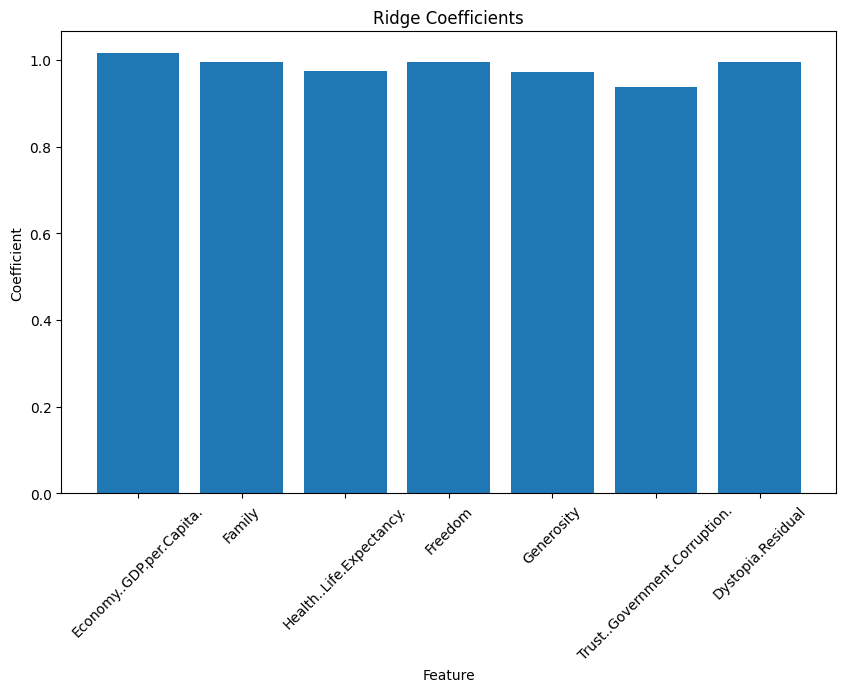

In [58]:
%matplotlib inline
coefficients = best_model.coef_
feature_names = X.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Ridge Coefficients')
plt.show()

1. Is the relationship significant?

  A: yes, because the R-sqaured is 1 which is very high and all features' p value is 0, so the relationship is very much significant

2. Are any model assumptions violated?

  Assumptions such as linearity, homoscedasticity, independence of errors, and normality of errors are typically assessed in regression analysis. The OLS model summary provided by the statsmodels library includes diagnostic tests and statistics to evaluate these assumptions. Violations of these assumptions may indicate potential issues with the model's validity.

3. Based on the provided VIF values:

  Economy..GDP.per.Capita. and Family have VIF values exceeding 10, indicating potential multicollinearity issues with these variables.
  Health..Life.Expectancy. also has a high VIF value, further suggesting multicollinearity.
  Freedom, Generosity, Trust..Government.Corruption., and Dystopia.Residual have lower VIF values, indicating less multicollinearity for these variables.

4. In the multivariate models are predictor variables independent of all the other predictor variables? (-0.1 TO 0.1)
A: No, they are not all independent of each other,especially Economy..GDP.per.Capita.,Generosity, Dystopia.Residual we can know that from the correlation heap map.

5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
A: the most significant predictor variable is Dystopia.Residual	, and Trust..Government.Corruption is the most insiginificant one.

6. Does the model make sense?
A: yes, the qustion is a multivariate regression question and models in AutoML can deal with it

  7. *Does regularization help?****
no, the rmse from the best model is 0.0290274, however, in regularization, the rmse is 0.036866

8. Which independent variables are significant?
  the most significant predictor variable is Dystopia.Residual

9. Which hyperparameters are important?
The importance of hyperparameters can vary depending on the model and the specific problem. In the code, the alpha value for Ridge regression (0.5) and the maximum number of models for AutoML (10) are specified. Tuning these hyperparameters and evaluating their impact on model performance could provide insights into their importance.

10. Coding professionalism?
yes

REFERENCES:
1. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb
2. chatgpt

MIT License

Copyright (c) 2024 prachichatur04

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.